# Job Retention Project



### Project Introduction:

    Employees are an essential component of any company and there are many people who leave their jobs. The job retention project aims to analyze the employees' information to build machine learning models. The models will predict whether the employees will leave the company or not. On the other hand, the analysis will help the company to define the features that impact job retention. 


In [1]:
# Import all packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import imblearn.over_sampling

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,classification_report


## Dataset

In [2]:
# Load dataset
df = pd.read_csv('HR_comma_sep.csv')
# Check the first 5 rows
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The data info shows:
1- There are no missing values.
2- Department and salary columns are categorical.


In [4]:
# Take a look at the statistical features
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Take a look at columns names
df.columns = df.columns.map(str.strip)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Take a copy of the dataset to work with
df_copy = df.copy()

## Visualization

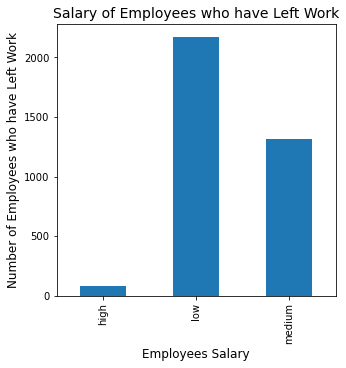

In [7]:
# Plot bar charts showing the impact of employee salaries on retention

plt.figure(figsize=(5,5)),
df_copy.groupby(['salary'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who have Left Work', fontsize=12)
plt.xlabel('Employees Salary', fontsize =12)

plt.title("Salary of Employees who have Left Work",fontsize=14)
plt.show()

It founds that employees with high salary are not left the company. Whereas those who have mid or low salaries are most likely to leave the company.

Also, means the salary columns are necessary for the prediction.

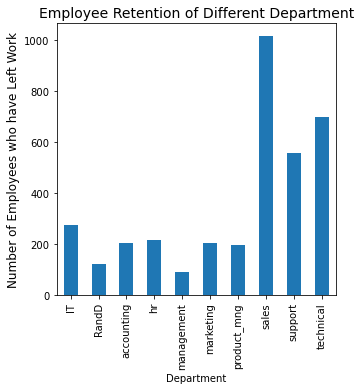

In [8]:
# Plot bar charts showing a correlation between department and employee retention
plt.figure(figsize=(5,5))
df_copy.groupby(['Department'])['left'].sum().plot.bar()
plt.ylabel('Number of Employees who have Left Work',fontsize=12)

plt.title("Employee Retention of Different Department",fontsize=14)
plt.show()

Some departments have a high number of (left), and some are low. It means the department columns matter in prediction.

## Check all features to Eliminate nonimportant features

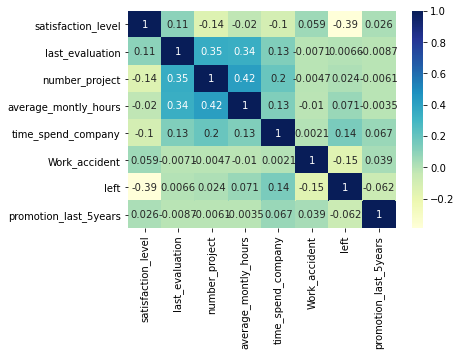

In [9]:
# View the correlations matrix
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

The correlations matrix shows that (Work_accident and promotion_last_5years) columns are not important. 

In [10]:
# Eliminating the features that are not important for the analysis
final_data = df_copy.copy()
final_data = final_data.drop('Work_accident', axis=1)
final_data = final_data.drop('promotion_last_5years', axis=1)

# Recheck the first 5 rows after eliminating the columns
final_data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Department,salary
0,0.38,0.53,2,157,3,1,sales,low
1,0.80,0.86,5,262,6,1,sales,medium
2,0.11,0.88,7,272,4,1,sales,medium
3,0.72,0.87,5,223,5,1,sales,low
4,0.37,0.52,2,159,3,1,sales,low


In [11]:
# Convert categorical variables into binary dummy variables.
df_dummy = pd.get_dummies(final_data)

# Assign the coulmns
y = df_dummy.pop('left')
x = df_dummy


In [12]:
# check if the data is balanced or not.
df_copy.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

There is a big difference between the values. Therefore, the data needs to be balanced.

In [13]:
# Balance the dataset using Random Under Sampler


# Setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y == 1)
n_neg = np.sum(y == 0)
ratio = {1 : n_pos * 3, 0 : n_neg} 

# Randomly oversample
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 

x, y = ROS.fit_resample(x, y)

# Recheck the data
y.value_counts()

0    11428
1    10713
Name: left, dtype: int64

## Train the model


#### Logistic Regression model

In [14]:
# Divide the dataset into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [15]:
# Train the model with Logistic Regression

# Scale the feature first
model_LR = StandardScaler()
x_train = model_LR.fit_transform(x_train)   
x_test = model_LR.transform(x_test)

# Logistic Regression
classifier_LR = LogisticRegression(random_state = 0) 
classifier_LR.fit(x_train, y_train)

# Predict
y_predict_LR = classifier_LR.predict(x_test)


In [16]:
# Evaluate the performance of Logistic Regression model
print("\n-------------------------------------------------------")
print("     Train the model with Logistic Regression      ")
print("-------------------------------------------------------\n")
print(classification_report(y_test, y_predict_LR))


-------------------------------------------------------
     Train the model with Logistic Regression      
-------------------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2860
           1       0.75      0.79      0.77      2676

    accuracy                           0.77      5536
   macro avg       0.77      0.77      0.77      5536
weighted avg       0.77      0.77      0.77      5536



#### K Neighbors model

In [17]:
# Divide the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [18]:
# Train the model with KNeighborsClassifier

# Choose n_neighbors=2 at first based on the number of classes
model_knn = StandardScaler()
X_train_knn = model_knn.fit_transform(X_train)   
X_test_knn = model_knn.transform(X_test)

# K Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn = model_knn.fit(X_train_knn,y_train)   

# Predict
y_predict_knn = model_knn.predict(X_test_knn)



In [24]:
# Evaluate the performance of K Neighbors model
print("\n-------------------------------------------------------")
print("          Train the model with K Neighbors      ")
print("-------------------------------------------------------\n")
print(classification_report(y_test, y_predict_knn))


-------------------------------------------------------
          Train the model with K Neighbors      
-------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2860
           1       0.97      0.99      0.98      2676

    accuracy                           0.98      5536
   macro avg       0.98      0.98      0.98      5536
weighted avg       0.98      0.98      0.98      5536



In [20]:
# Find the value of k that represent number of neighbors
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn,y_train)
    pred_i = knn.predict(X_test_knn)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

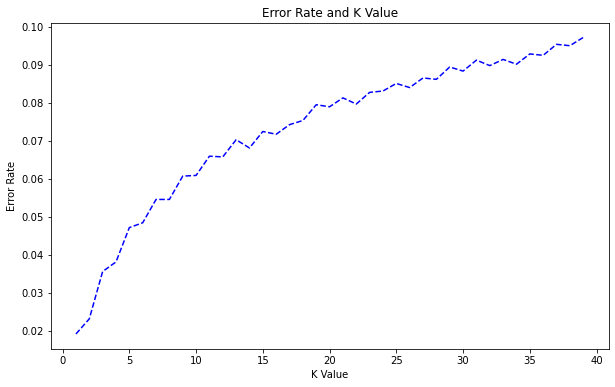

In [21]:
# Plot the error rate to decide the number of neighbors  based on the lowest error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed')
plt.title('Error Rate and K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

## Conclusion

The K Neighbors model has higher results than the Logistic Regression model.
Therefor, the K Neighbors model will be used to predict the retention of an employee.


For the Logistic regression model, the result of the recall and f1-score are 85% and 81%, respectively. Whereas the k-nearest neighbors' model, the result of the recall and f1-score are 99% and 98%, respectively.

